In [34]:
import pandas as pd
import json

# Open and load the JSON file
with open('./logs/gameLog.json') as f:
    data = json.load(f)

# Convert the 'turns' list into a pandas DataFrame
df = pd.DataFrame(data['turns'])

# Print the DataFrame to verify the result
print(df)
print(df.columns)

    currentCar       cars                balance      speed                 y  \
0            1  [0, 1, 2]  [17500, 17456, 17500]  [0, 3, 0]         [0, 3, 0]   
1            2  [0, 1, 2]  [17500, 17456, 17468]  [0, 3, 2]         [0, 6, 2]   
2            0  [0, 1, 2]  [17468, 17456, 17468]  [2, 3, 2]         [2, 9, 4]   
3            1  [0, 1, 2]  [17468, 17402, 17468]  [2, 6, 2]        [4, 15, 6]   
4            2  [0, 1, 2]  [17468, 17402, 17152]  [2, 1, 3]        [6, 16, 9]   
..         ...        ...                    ...        ...               ...   
153          1  [0, 1, 2]    [9126, 4670, 12663]  [1, 4, 4]   [981, 954, 737]   
154          2  [0, 1, 2]    [9126, 4670, 12663]  [1, 4, 4]   [982, 958, 741]   
155          0  [0, 1, 2]    [7513, 4670, 12663]  [7, 4, 4]   [989, 962, 745]   
156          1  [0, 1, 2]    [7513, 2336, 12663]  [7, 9, 4]   [996, 971, 749]   
157          2  [0, 1, 2]    [7513, 2336, 12663]  [7, 9, 4]  [1003, 971, 749]   

        shield             

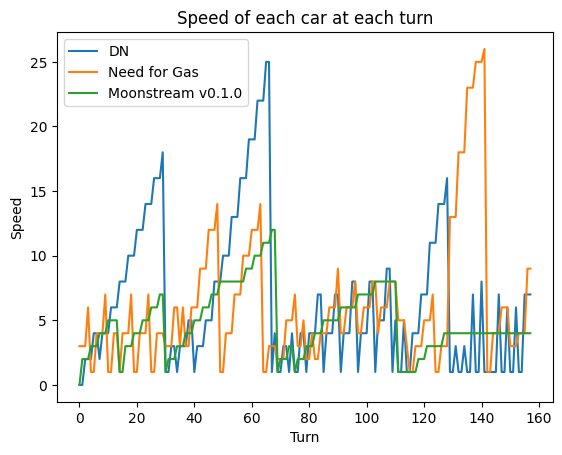

In [35]:

import matplotlib.pyplot as plt

df_speed = pd.DataFrame(df['speed'].to_list(), columns=data['cars'])

# Plot a line for each car
for car in data['cars']:
    plt.plot(df_speed[car], label=car)

# Add a legend and labels
plt.legend()
plt.xlabel('Turn')
plt.ylabel('Speed')
plt.title('Speed of each car at each turn')

# Show the plot
plt.show()

# 

/home/andrey/moonstream-competion/0xTitans-Public/.titans/lib/python3.8/site-packages/matplotlib/animation.py:884: UserWarning: Animation was deleted without rendering anything. This is most likely not intended. To prevent deletion, assign the Animation to a variable, e.g. `anim`, that exists until you output the Animation using `plt.show()` or `anim.save()`.
  warnings.warn(


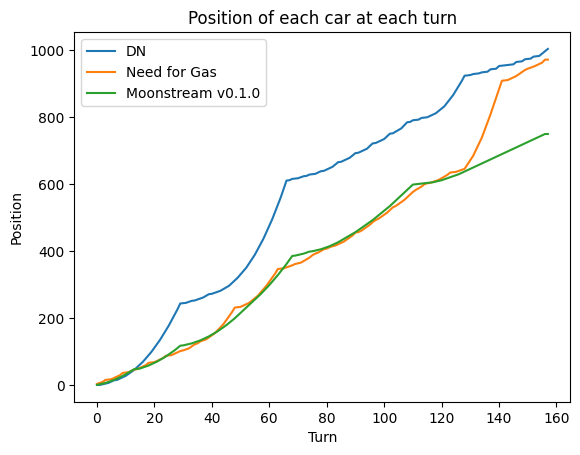

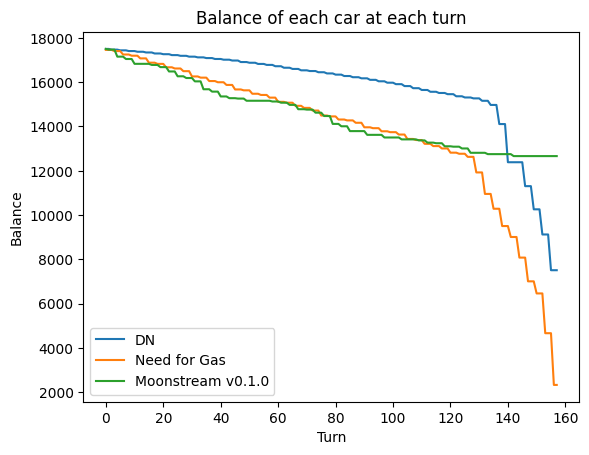

In [36]:
import matplotlib.animation as animation



# Create mapping for cars to their indices in the main cars list
car_indices = {car: i for i, car in enumerate(data['cars'])}

# Separate the position and balance data for each car
position_data = {car: [] for car in data['cars']}
balance_data = {car: [] for car in data['cars']}
for turn in data['turns']:
    for i, car in enumerate(turn['cars']):
        position_data[data['cars'][int(car)]].append(turn['y'][i])
        balance_data[data['cars'][int(car)]].append(turn['balance'][i])

# Setup the figures and the axes
fig1, ax1 = plt.subplots()
fig2, ax2 = plt.subplots()
x = list(range(len(data['turns'])))  # turns
lines1 = [ax1.plot(x, position_data[car], label=car)[0] for car in data['cars']]  # lines for positions
lines2 = [ax2.plot(x, balance_data[car], label=car)[0] for car in data['cars']]  # lines for balances
ax1.legend()
ax2.legend()

def animate(i):
    for j, line in enumerate(lines1):
        line.set_ydata(position_data[data['cars'][j]][:i+1])  # update the y-data of each line
    for j, line in enumerate(lines2):
        line.set_ydata(balance_data[data['cars'][j]][:i+1])  # update the y-data of each line

ani1 = animation.FuncAnimation(fig1, animate, frames=len(data['turns']), interval=200)
ani2 = animation.FuncAnimation(fig2, animate, frames=len(data['turns']), interval=200)

ax1.set_xlabel('Turn')
ax1.set_ylabel('Position')
ax1.set_title('Position of each car at each turn')

ax2.set_xlabel('Turn')
ax2.set_ylabel('Balance')
ax2.set_title('Balance of each car at each turn')

plt.show()


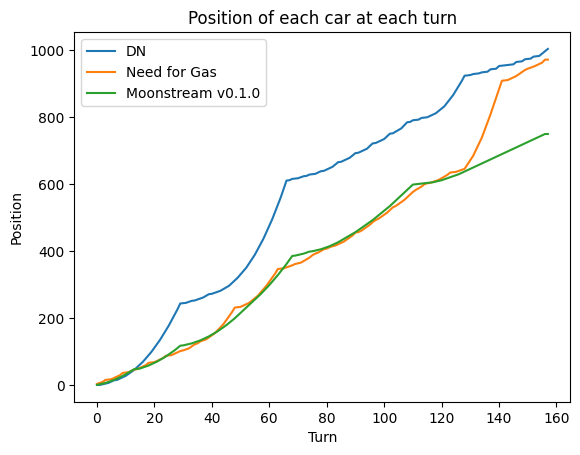

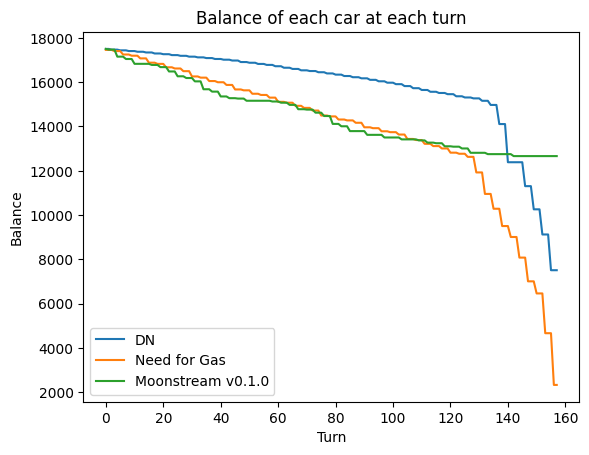

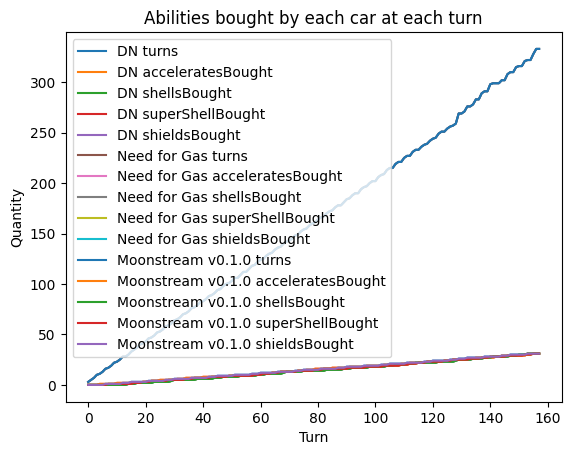

In [37]:
# Create mapping for cars to their indices in the main cars list
car_indices = {car: i for i, car in enumerate(data['cars'])}

# Separate the position, balance and abilities data for each car
position_data = {car: [] for car in data['cars']}
balance_data = {car: [] for car in data['cars']}
abilities_data = {car: {'turns': [], 'acceleratesBought': [], 'shellsBought': [], 'superShellBought': [], 'shieldsBought': []} for car in data['cars']}

for turn in data['turns']:
    for i, car in enumerate(turn['cars']):
        position_data[data['cars'][int(car)]].append(turn['y'][i])
        balance_data[data['cars'][int(car)]].append(turn['balance'][i])
        abilities = abilities_data[data['cars'][int(car)]]
        abilities['turns'].append(turn['bought'][0])
        abilities['acceleratesBought'].append(turn['bought'][1])
        abilities['shellsBought'].append(turn['bought'][2])
        abilities['superShellBought'].append(turn['bought'][3])
        abilities['shieldsBought'].append(turn['bought'][4])

# Setup the figures and the axes
fig1, ax1 = plt.subplots()
fig2, ax2 = plt.subplots()
fig3, ax3 = plt.subplots()
x = list(range(len(data['turns'])))  # turns
lines1 = [ax1.plot(x, position_data[car], label=car)[0] for car in data['cars']]  # lines for positions
lines2 = [ax2.plot(x, balance_data[car], label=car)[0] for car in data['cars']]  # lines for balances
lines3 = [[ax3.plot(x, abilities_data[car][ability], label=f'{car} {ability}')[0] for ability in ['turns', 'acceleratesBought', 'shellsBought', 'superShellBought', 'shieldsBought']] for car in data['cars']]
ax1.legend()
ax2.legend()
ax3.legend()

def animate(i):
    for j, line in enumerate(lines1):
        line.set_ydata(position_data[data['cars'][j]][:i+1])  # update the y-data of each line
    for j, line in enumerate(lines2):
        line.set_ydata(balance_data[data['cars'][j]][:i+1])  # update the y-data of each line
    for j, car_lines in enumerate(lines3):
        for k, line in enumerate(car_lines):
            ability = ['turns', 'acceleratesBought', 'shellsBought', 'superShellBought', 'shieldsBought'][k]
            line.set_ydata(abilities_data[data['cars'][j]][ability][:i+1])  # update the y-data of each line

ani1 = animation.FuncAnimation(fig1, animate, frames=len(data['turns']), interval=200)
ani2 = animation.FuncAnimation(fig2, animate, frames=len(data['turns']), interval=200)
ani3 = animation.FuncAnimation(fig3, animate, frames=len(data['turns']), interval=200)

ax1.set_xlabel('Turn')
ax1.set_ylabel('Position')
ax1.set_title('Position of each car at each turn')

ax2.set_xlabel('Turn')
ax2.set_ylabel('Balance')
ax2.set_title('Balance of each car at each turn')

ax3.set_xlabel('Turn')
ax3.set_ylabel('Quantity')
ax3.set_title('Abilities bought by each car at each turn')

plt.show()

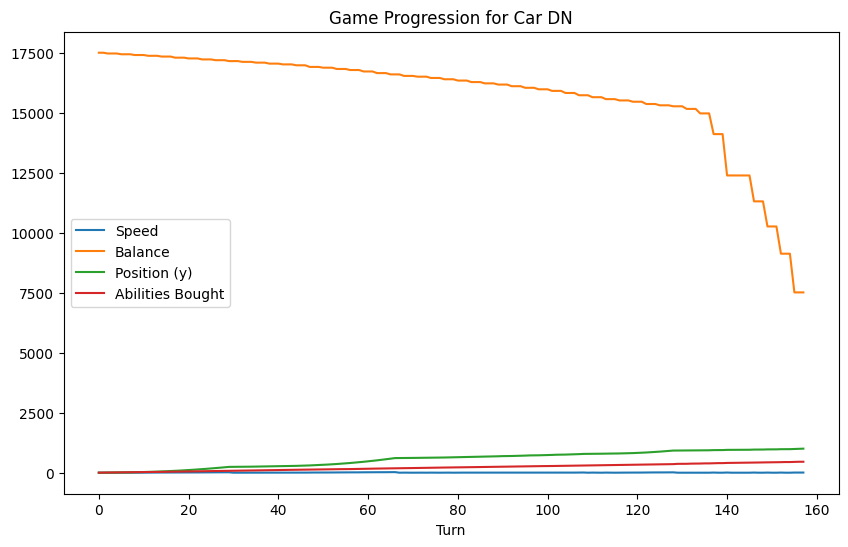

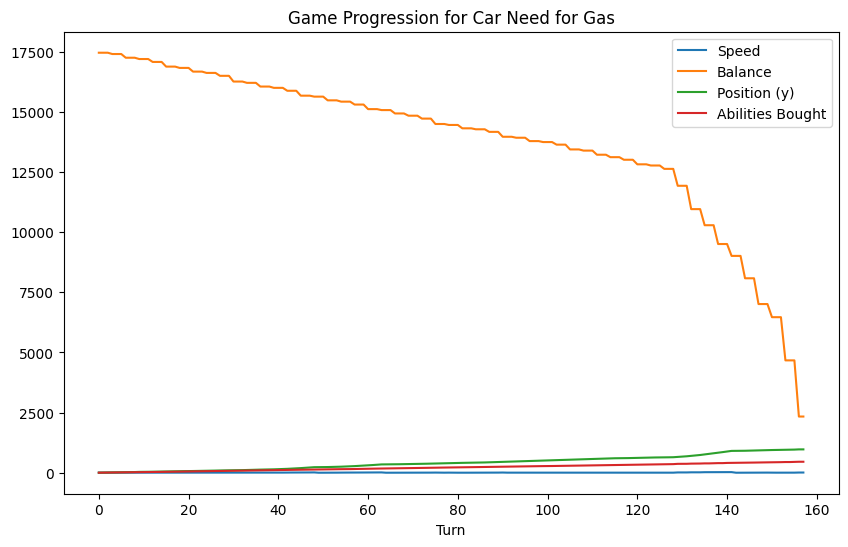

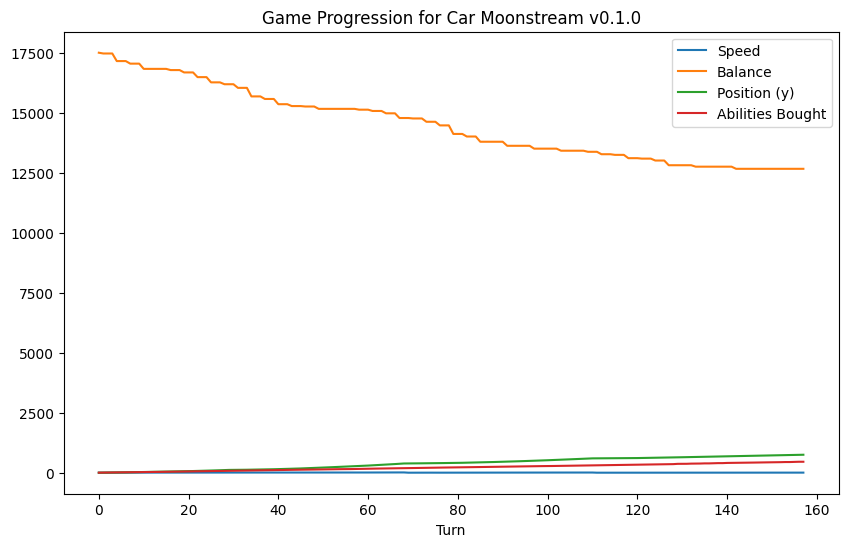

In [39]:
with open('./logs/gameLog.json') as f:
    data = json.load(f)

# Create mapping for cars to their indices in the main cars list
car_indices = {car: i for i, car in enumerate(data['cars'])}

# Separate the speed, balance, position and abilities data for each car
speed_data = {car: [] for car in data['cars']}
balance_data = {car: [] for car in data['cars']}
position_data = {car: [] for car in data['cars']}
abilities_data = {car: [] for car in data['cars']}

for turn in data['turns']:
    for i, car in enumerate(turn['cars']):
        speed_data[data['cars'][int(car)]].append(turn['speed'][i])
        balance_data[data['cars'][int(car)]].append(turn['balance'][i])
        position_data[data['cars'][int(car)]].append(turn['y'][i])
        abilities_data[data['cars'][int(car)]].append(sum(turn['bought']))

# For each car, plot speed, balance, position, and number of abilities bought
for car in data['cars']:
    plt.figure(figsize=(10, 6))
    plt.plot(speed_data[car], label='Speed')
    plt.plot(balance_data[car], label='Balance')
    plt.plot(position_data[car], label='Position (y)')
    plt.plot(abilities_data[car], label='Abilities Bought')
    plt.legend()
    plt.xlabel('Turn')
    plt.title(f'Game Progression for Car {car}')
    plt.show()

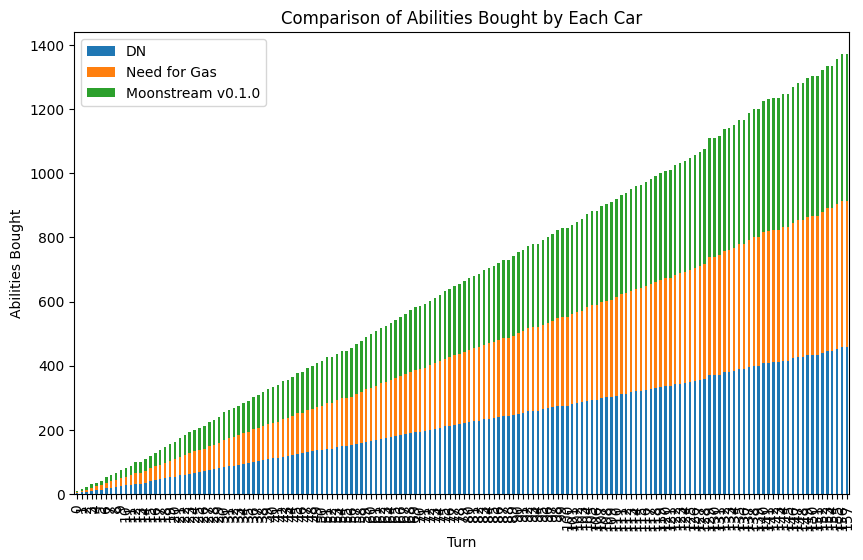

In [40]:
turns_data = []

for turn in data['turns']:
    # Create a dictionary to hold the data for this turn
    turn_data = {}
    for i, car in enumerate(turn['cars']):
        # Add the number of each ability bought by this car in this turn to the dictionary
        turn_data[data['cars'][int(car)]] = sum(turn['bought'])
    # Add the dictionary to the list
    turns_data.append(turn_data)

# Create a DataFrame from the list
df = pd.DataFrame(turns_data)

# Plot the DataFrame as a stacked bar chart
df.plot(kind='bar', stacked=True, figsize=(10,6))
plt.xlabel('Turn')
plt.ylabel('Abilities Bought')
plt.title('Comparison of Abilities Bought by Each Car')
plt.show()